In [9]:
from netCDF4 import Dataset, num2date
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [10]:
nc = Dataset("MEDSEA_OMI_SST_area_averaged_anomalies_1982_to_2023.nc")

print(nc.variables.keys())

dict_keys(['time', 'sst_anomaly', 'sst_anomaly_filtered'])


In [11]:
time = nc.variables['time'][:]
sst = nc.variables['sst_anomaly'][:]

import pandas as pd
df = pd.DataFrame({'time': time, 'sst_anomaly': sst})
print(df.head())


    time  sst_anomaly
0  11702    -0.228126
1  11733    -0.251763
2  11761    -0.639396
3  11792    -0.828476
4  11822    -1.347137


In [12]:
dates = num2date(time, units=nc.variables['time'].units)

df = pd.DataFrame({'time': dates, 'sst_anomaly': sst})
print(df.head())


                  time  sst_anomaly
0  1982-01-15 00:00:00    -0.228126
1  1982-02-15 00:00:00    -0.251763
2  1982-03-15 00:00:00    -0.639396
3  1982-04-15 00:00:00    -0.828476
4  1982-05-15 00:00:00    -1.347137


In [5]:
from netCDF4 import Dataset, num2date
import pandas as pd

nc = Dataset("MEDSEA_OMI_SST_area_averaged_anomalies_1982_to_2023.nc")

time = nc.variables['time'][:]
sst = nc.variables['sst_anomaly'][:]

dates = num2date(time, units=nc.variables['time'].units)

df = pd.DataFrame({'time': dates, 'sst_anomaly': sst})

print(df.head())

df.to_csv("anomalies_mediterranean_1982_to_2023.csv", index=False)


                  time  sst_anomaly
0  1982-01-15 00:00:00    -0.228126
1  1982-02-15 00:00:00    -0.251763
2  1982-03-15 00:00:00    -0.639396
3  1982-04-15 00:00:00    -0.828476
4  1982-05-15 00:00:00    -1.347137


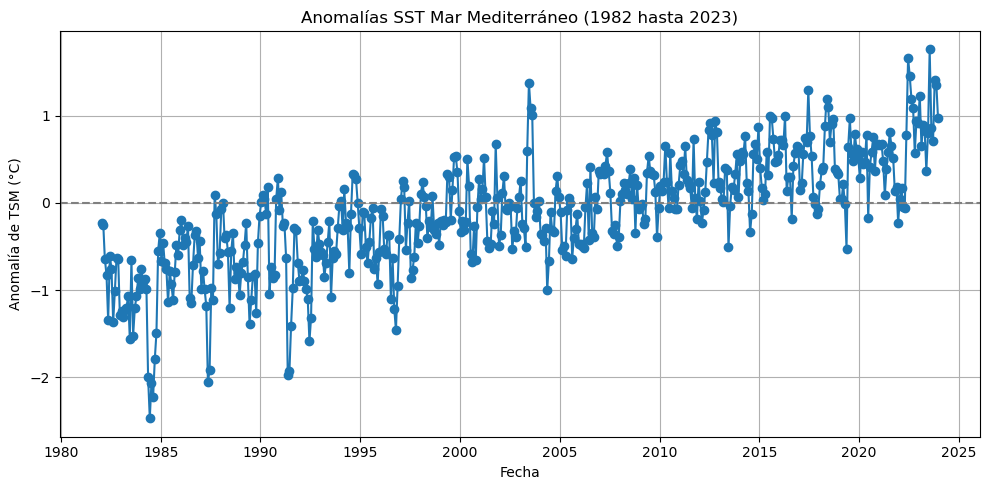

In [13]:
from netCDF4 import Dataset, num2date
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def procesar_y_graficar_anomalias(ruta_archivo_nc, nombre_csv, titulo_grafico):
    
    nc = Dataset(ruta_archivo_nc)

    time = nc.variables['time'][:]
    sst = nc.variables['sst_anomaly'][:]

    fechas_cftime = num2date(time, units=nc.variables['time'].units)
    fechas = [datetime(d.year, d.month, d.day) for d in fechas_cftime]

    df = pd.DataFrame({'time': fechas, 'sst_anomaly': sst})

    df.to_csv(nombre_csv, index=False)

    plt.figure(figsize=(10, 5))
    plt.plot(df['time'], df['sst_anomaly'], marker='o', linestyle='-')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(titulo_grafico)
    plt.xlabel("Fecha")
    plt.ylabel("Anomalía de TSM (°C)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

procesar_y_graficar_anomalias(
    "MEDSEA_OMI_SST_area_averaged_anomalies_1982_to_2023.nc",
    "anomalies_mediterranean_1982_to_2023.csv",
    "Anomalías SST Mar Mediterráneo (1982 hasta 2023)"
)


Este gráfico muestra la evolución de las anomalías mensuales de la temperatura de la superficie del mar Mediterráneo desde 1982 hasta 2023, basado en datos satelitales proporcionados por el Servicio Marino de Copernicus.Estos datos son tomados por todos las países que rodean el Mar Mediterráneo para tener mayor precisión en los valores de la temperatura. Incluyen países europeos como España, Francia, Mónaco, Italia, Eslovenia, Croacia, Albania, Bosnia y Herzegovina, Montenegro, Grecia y Chipre, tambien incluye países asiáticos como Turquía, Siria, Libano, Israel y Palestina, y  incluye datos de países africanos como Egipto, Libia, Túnez, Argelia, Marruecos. Se observa una tendencia creciente sostenida y prácticamente lineal, con un incremento acumulado de aproximadamente 2,7 °C en 41 años. Esta evolución pone de manifiesto el impacto del cambio climático en una de las regiones marinas más sensibles del planeta, con implicaciones directas en los ecosistemas marinos, la biodiversidad y las actividades económicas como la pesca o el turismo. Esta tendencia confirma la urgencia de seguir monitorizando el calentamiento del Mediterráneo y refuerza la necesidad de tomar medidas efectivas para mitigar sus efectos en el medio ambiente y las sociedades costeras.